<a href="https://colab.research.google.com/github/kulyulinanina/-3-/blob/main/HW_3_Nina_Kulyulina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузим все необходимые библиотеки и файлы

In [ ]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Подключим google-диск для последующего импорта файлов с данными

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импортируем файлы с данными

dtypes = {
    'row_id': pd.Int32Dtype,
    'timestamp': pd.Int64Dtype,
    'user_id': pd.Int32Dtype,
    'content_id': pd.Int16Dtype,
    'content_type_id': pd.Int8Dtype,
    'task_container_id': pd.Int16Dtype,
    'user_answer': pd.Int8Dtype,
    'answered_correctly': pd.Int8Dtype,
    'prior_question_elapsed_time': pd.Float32Dtype,
    'prior_question_had_explanation': pd.BooleanDtype
}

file_path_1 = '/content/drive/My Drive/train.csv'
file_path_2 = '/content/drive/My Drive/questions.csv'
file_path_3 = '/content/drive/My Drive/lectures.csv'

with open(file_path_1, 'r') as file:
    train = pd.read_csv(file, dtype = dtypes)

with open(file_path_2, 'r') as file:
    questions = pd.read_csv(file)

with open(file_path_3, 'r') as file:
    lectures = pd.read_csv(file)

<ipython-input-23-b8360ef6058c>:21: UserWarning: Instantiating Int32Dtype without any arguments.Pass a Int32Dtype instance to silence this warning.
  train = pd.read_csv(file, dtype = dtypes)
<ipython-input-23-b8360ef6058c>:21: UserWarning: Instantiating Int64Dtype without any arguments.Pass a Int64Dtype instance to silence this warning.
  train = pd.read_csv(file, dtype = dtypes)
<ipython-input-23-b8360ef6058c>:21: UserWarning: Instantiating Int16Dtype without any arguments.Pass a Int16Dtype instance to silence this warning.
  train = pd.read_csv(file, dtype = dtypes)
<ipython-input-23-b8360ef6058c>:21: UserWarning: Instantiating Int8Dtype without any arguments.Pass a Int8Dtype instance to silence this warning.
  train = pd.read_csv(file, dtype = dtypes)
<ipython-input-23-b8360ef6058c>:21: UserWarning: Instantiating Float32Dtype without any arguments.Pass a Float32Dtype instance to silence this warning.
  train = pd.read_csv(file, dtype = dtypes)
<ipython-input-23-b8360ef6058c>:21: Us

# Выведем первые строки датафреймов, чтобы увидеть основные характеристики данных

In [24]:
# Датафрейм train

print("Train Data (первые строки):")
train.head()

Train Data (первые строки):


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,<NA>,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
# Датафрейм lectures

print("Lectures Data (первые строки):")
lectures.head()

Lectures Data (первые строки):


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [ ]:
# Датафрейм questions

print("Questions Data (первые строки):")
questions.head()

Questions Data (первые строки):


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


Мы видим, что данные загрузились корректно. В то же время, как минимум в одном датафрейме присутствуют пропуски

# Проверим данные на пропущенные значения

In [25]:
# Датафрейм train

print("Пропущенные значения в train:")
train.isnull().sum()

Пропущенные значения в train:


,0
row_id,0
timestamp,0
user_id,0
content_id,0
content_type_id,0
task_container_id,0
user_answer,0
answered_correctly,0
prior_question_elapsed_time,2351538
prior_question_had_explanation,392506


In [ ]:
# Датафрейм lectures

rint("Пропущенные значения в lectures:")
lectures.isnull().sum()

Пропущенные значения в lectures:


,0
lecture_id,0
tag,0
part,0
type_of,0


In [ ]:
# Датафрейм questions

print("Пропущенные значения в questions:")
questions.isnull().sum()

Пропущенные значения в questions:


,0
question_id,0
bundle_id,0
correct_answer,0
part,0
tags,1


Мы видим, что в двух датафреймах присутствуют пропущенные значения. Обработаем их

# Обработка пропусков

In [26]:
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].mean())

In [27]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].fillna(False)

In [29]:
questions['tags'] = questions['tags'].fillna(False)

Теперь вновь проверим данные на наличие пропусков

In [30]:
# Датафрейм train

print("Пропущенные значения в train:")
train.isnull().sum()

Пропущенные значения в train:


,0
row_id,0
timestamp,0
user_id,0
content_id,0
content_type_id,0
task_container_id,0
user_answer,0
answered_correctly,0
prior_question_elapsed_time,0
prior_question_had_explanation,0


In [31]:
# Датафрейм questions

print("Пропущенные значения в questions:")
questions.isnull().sum()

Пропущенные значения в questions:


,0
question_id,0
bundle_id,0
correct_answer,0
part,0
tags,0


Мы видим, что пропусков в данных больше нет. Продолжаем работу с датафреймом

# Выведем статистическую сводку числовых данных

In [33]:
# Датафрейм train

print("\nTrain - Статистическая сводка:")
train.describe()


Train - Статистическая сводка:


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,101230332.0,101230332.0,101230332.0,101230332.0,101230332.0,101230332.0,101230332.0,101230332.0,101230332.0
mean,50615165.5,7703643654.326523,1076732424.202999,5219.604757,0.019352,904.062366,1.376123,0.625164,25422.789062
std,29222679.859518,11592655308.525589,619716349.500642,3866.35894,0.13776,1358.302181,1.192896,0.522531,19715.099609
min,0.0,0.0,115.0,0.0,0.0,0.0,-1.0,-1.0,0.0
25%,25307582.75,524343559.0,540811564.0,2063.0,0.0,104.0,0.0,0.0,16000.0
50%,50615165.5,2674233764.5,1071781070.0,5026.0,0.0,382.0,1.0,1.0,21000.0
75%,75922748.25,9924550562.75,1615741676.0,7425.0,0.0,1094.0,3.0,1.0,29000.0
max,101230331.0,87425772049.0,2147482888.0,32736.0,1.0,9999.0,3.0,1.0,300000.0


Отметим некоторые интересные закономерности, полученные из данной сводки по датафрейму:
- Среднее значение content_type_id — 0.019 — говорит о том, что основная часть данных относится к вопросам.
- Время (timestamp) имеет очень большое стандартное отклонение — 1.1 трлн миллисекунд, что указывает на высокую вариативность во времени взаимодействия пользователей с платформой.
- Стандартное отклонение для answered_correctly относительно невелико (около 0.52), что указывает на относительную однородность результатов среди студентов.
- Максимальное время (timestamp) — 874,257,000 миллисекунд (или примерно 10 дней), что показывает, что некоторые пользователи использовали платформу в течение длительного периода.
- Медиана для времени (timestamp) составляет 267,423,376 миллисекунд, что эквивалентно примерно 3 дням использования.
- Медиана правильных ответов (answered_correctly) равна 1, что указывает на то, что большинство пользователей отвечали правильно на свои вопросы.
- Медианное время на предыдущие вопросы (prior_question_elapsed_time) составляет 21,000 миллисекунд (или 21 секунда), что является разумным временем для обработки и ответа на вопрос.

В целом, можно сказать, что большинство пользователей на платформе отвечают правильно на вопросы, с разумным средним временем на ответ около 21–25 секунд. Однако наблюдается высокая вариативность во времени использования платформы, что может говорить о том, что одни пользователи взаимодействуют активно и быстро, а другие — реже и с большими перерывами.

In [35]:
# Датафрейм lectures

print("\nLectures - Статистическая сводка:")
lectures.describe()


Lectures - Статистическая сводка:


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


Отметим некоторые интересные закономерности, полученные из данной сводки по датафрейму:
- Среднее значение part — 4.27, что указывает на то, что большинство лекций относится ко второй половине учебного курса.
- На это же указывает и значение стандартного отклонение для part — 1.87.
- Медианное значение для part — 5, то есть половина лекций находится в 5-й части курса.

In [36]:
# Датафрейм questions

print("\nQuestions - Статистическая сводка:")
questions.describe()


Questions - Статистическая сводка:


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


Отметим некоторые интересные закономерности, полученные из данной сводки по датафрейму:
- Максимальное значение для correct_answer равно 3, что говорит о том, что ответы могут варьироваться от 0 до 3.
- Стандартное отклонение для correct_answer — 1.15, что говорит о достаточно большом разбросе правильных ответов (от 0 до 3).

# Проведем разведывательный анализ данных (EDA)

Распределение правильных ответов (answered_correctly)

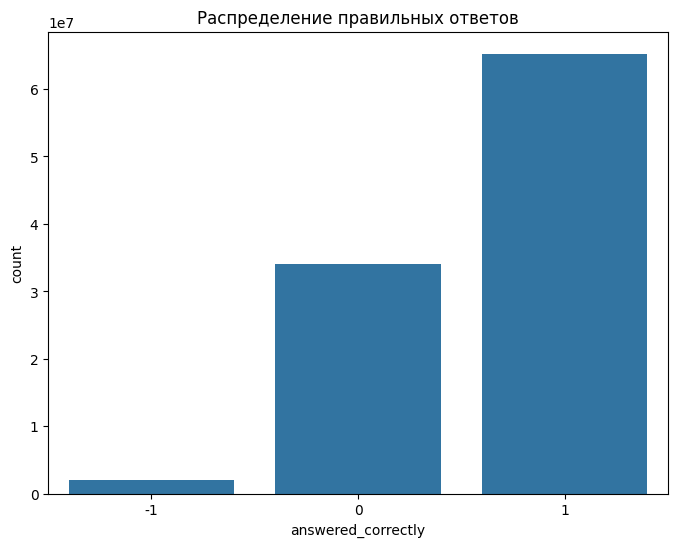

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='answered_correctly', data=train)
plt.title('Распределение правильных ответов')
plt.show()

Мы можем видеть, что правильных ответов дано значительно больше, чем неправильных

Распределение типов контента (content_type_id)

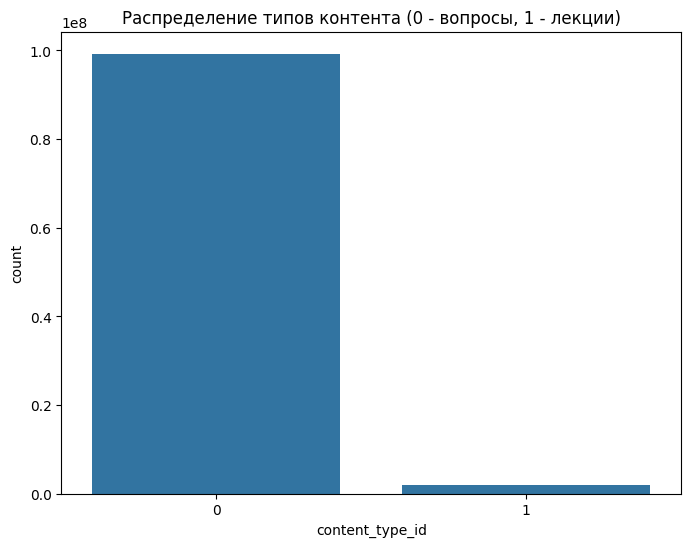

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='content_type_id', data=train)
plt.title('Распределение типов контента (0 - вопросы, 1 - лекции)')
plt.show()

Мы видим, что большую часть контента составляют вопросы

Визуализация времени, потраченного на предыдущий вопрос (prior_question_elapsed_time)

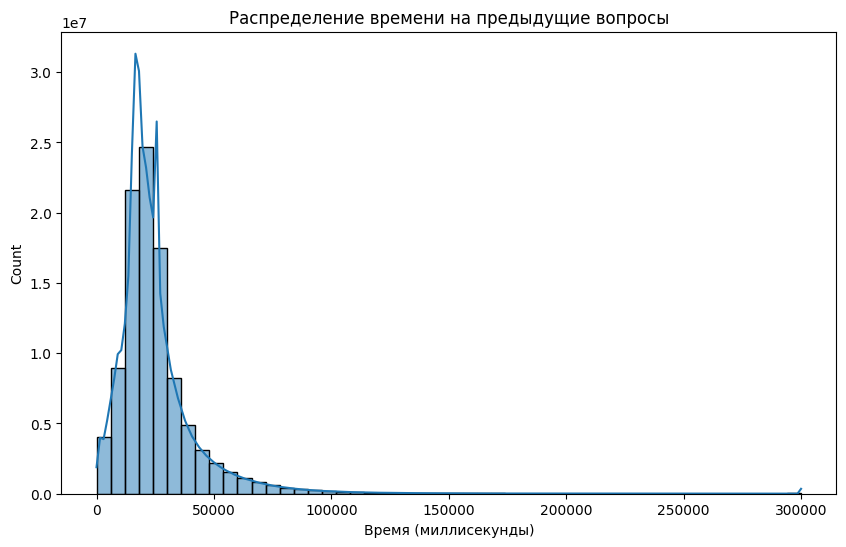

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(train['prior_question_elapsed_time'].dropna(), bins=50, kde=True)
plt.title('Распределение времени на предыдущие вопросы')
plt.xlabel('Время (миллисекунды)')
plt.show()

Мы видим, что время ответа варьируется достаточно сильно, однако в большинстве случаев варьируется в пределах до 1 минуты (60 000 миллисекунд)

Распределение правильных ответов по частям теста (part)

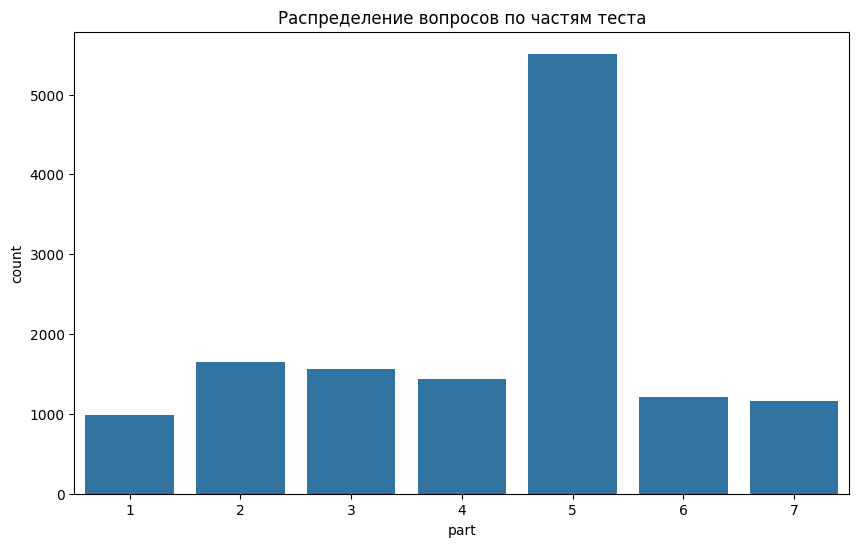

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=questions)
plt.title('Распределение вопросов по частям теста')
plt.show()

Как и отмечалось ранее, большая часть вопросов приходится на 5 часть теста

Распределение лекций по типам (type_of)

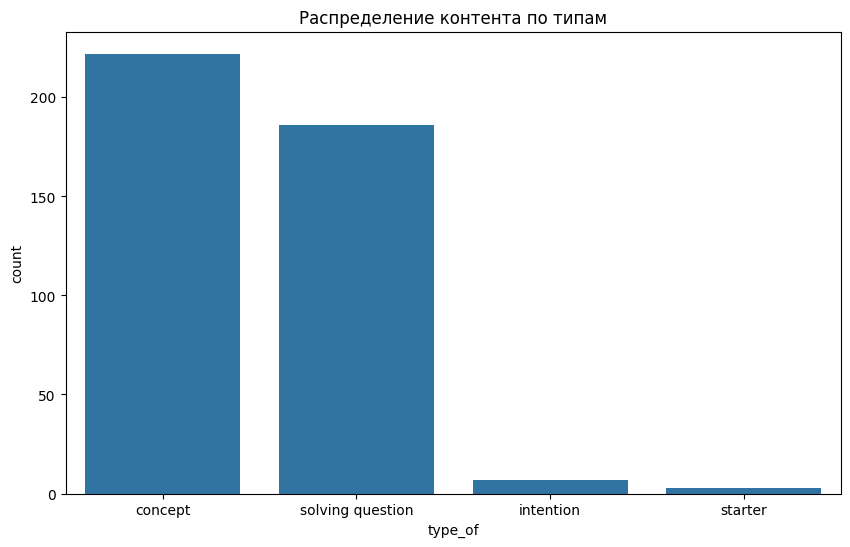

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of', data=lectures)
plt.title('Распределение контента по типам')
plt.show()

Мы видим, что большая часть контента относится к двум типам: concept и solving question

# Проанализируем дополнительно ряд характеристик, которые могут влиять на успеваемость студентов

Влияние объяснений на результат (prior_question_had_explanation)

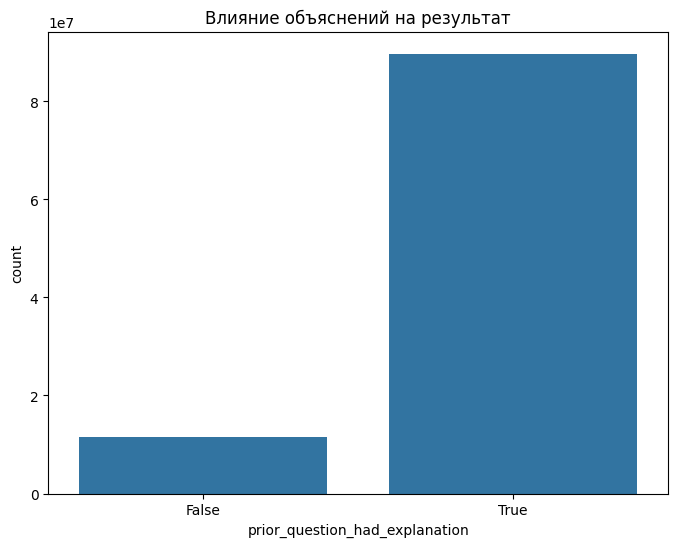

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='prior_question_had_explanation', data=train)
plt.title('Влияние объяснений на результат')
plt.show()

Как мы видим, наличие объяснения в значительной степени оказывает влияние на результат

Взаимосвязь между временем на предыдущие вопросы (prior_question_elapsed_time) и результатом (answered_correctly)

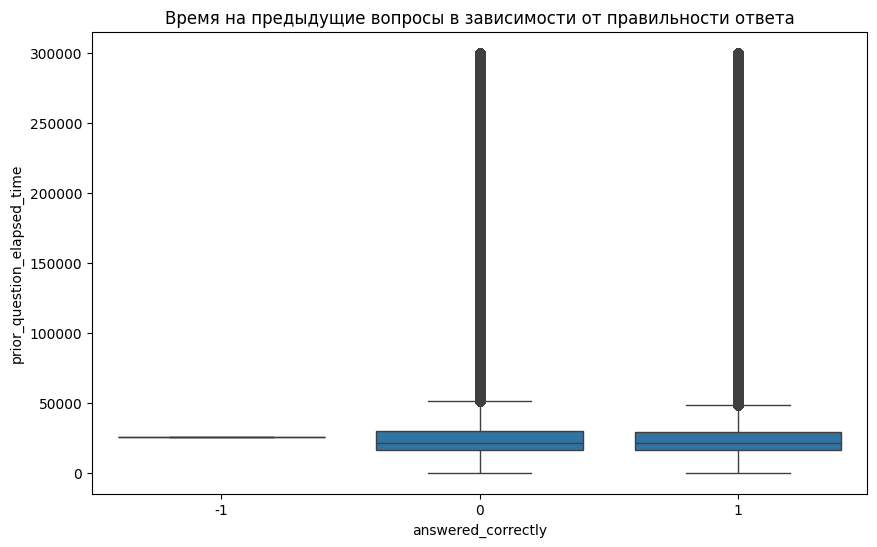

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered_correctly', y='prior_question_elapsed_time', data=train)
plt.title('Время на предыдущие вопросы в зависимости от правильности ответа')
plt.show()

Мы видим, что как для правильных, так и для неправильных ответов время ответов на предыдущие вопросы варьируется похожим образом

Среднее время выполнения задания в зависимости от content_type_id (0 - вопрос, 1 - лекция)

In [48]:
content_type_time = train.groupby('content_type_id')['prior_question_elapsed_time'].mean()
print("Среднее время выполнения задания по типам контента:\n", content_type_time)

Среднее время выполнения задания по типам контента:
 content_type_id
0       25423.625
1    25376.996094
Name: prior_question_elapsed_time, dtype: Float32


Мы видим, что время выполнения в зависимости от типа контента различается незначительно

Влияние разных частей теста на точность ответов

In [51]:
question_part_accuracy = train[train['content_type_id'] == 0].merge(
    questions[['question_id', 'part']],
    left_on='content_id', right_on='question_id'
).groupby('part')['answered_correctly'].mean()
print("Точность ответов по частям теста:\n", question_part_accuracy)

Точность ответов по частям теста:
 part
1    0.745032
2    0.708694
3    0.701456
4    0.630998
5    0.610088
6    0.669388
7    0.659601
Name: answered_correctly, dtype: Float64


Мы видим, что точность ответов расходится в зависимости от части теста и варьируется от 61 до 75%

# Проанализируем данные в группировке по пользователям

Среднее время ответа на вопрос по пользователям

In [55]:
avg_time_per_question = train.groupby('user_id')['prior_question_elapsed_time'].mean()
print("Среднее время ответа на вопрос по пользователям:\n", avg_time_per_question)

Среднее время ответа на вопрос по пользователям:
 user_id
115           20051.652344
124           19012.466797
2746          18787.699219
5382           35714.90625
8623          26081.322266
                  ...     
2147470770    23196.457031
2147470777         20077.5
2147481750    18087.539062
2147482216    19686.650391
2147482888    27125.074219
Name: prior_question_elapsed_time, Length: 393656, dtype: Float32


Не уходя в анализ каждого пользователя персонально, мы можем сказать, что время для разных пользователей значительно варьируется

Средняя точность пользователей

In [57]:
user_accuracy = train.groupby('user_id')['answered_correctly'].mean()
print("Средняя точность пользователей:\n", user_accuracy)

Средняя точность пользователей:
 user_id
115           0.695652
124           0.233333
2746               0.5
5382          0.632812
8623          0.598214
                ...   
2147470770        0.75
2147470777      0.6781
2147481750        0.76
2147482216    0.614286
2147482888    0.555556
Name: answered_correctly, Length: 393656, dtype: Float64


Не уходя, опять же, в анализ каждого пользователя персонально, мы можем сказать, что точность ответов пользователей является индивидуальной характеристикой, отличающейся для разных учащихся

# Построим тепловую карту корреляций для датафрейма train

Тепловая карта корреляций в данных train

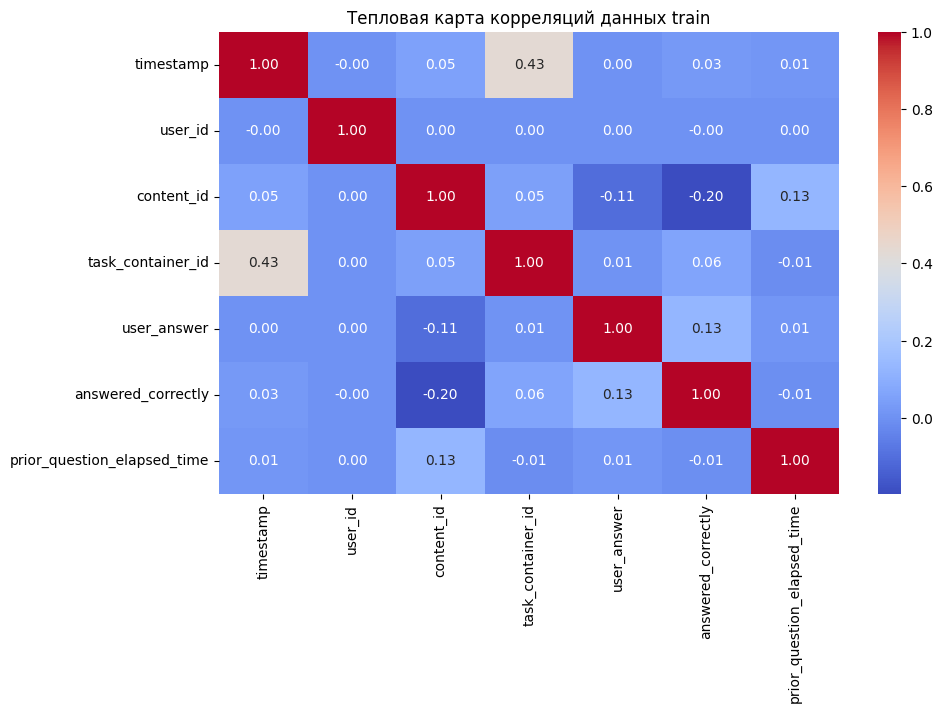

In [58]:
plt.figure(figsize=(10, 6))
corr_matrix = train[['timestamp', 'user_id', 'content_id', 'task_container_id',
                     'user_answer', 'answered_correctly', 'prior_question_elapsed_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляций данных train')
plt.show()

Из данной тепловой карты корреляций можно сделать следующие выводы:

**Сильные корреляции:**

- timestamp и task_container_id имеют достаточно высокую положительную корреляцию (0.43). Это указывает на то, что по мере увеличения времени взаимодействия пользователя с платформой задания чаще всего группируются в одинаковых task_container_id, вероятно, потому что пользователи последовательно проходят блоки заданий.
- answered_correctly и content_id имеют отрицательную корреляцию (-0.20). Это может указывать на то, что различные задания имеют разную сложность, и чем выше сложность задания (определяемая content_id), тем ниже вероятность того, что на него ответят правильно.

**Слабые корреляции:**

- answered_correctly и prior_question_elapsed_time имеют слабую положительную корреляцию (0.13), что может указывать на то, что большее время, потраченное на предыдущие вопросы, может слегка увеличить вероятность правильного ответа.
- user_answer и answered_correctly также показывают слабую положительную корреляцию (0.13), что логично, так как правильные ответы увеличивают вероятность того, что пользователь дал верный ответ.

**Практически отсутствующие корреляции:**

Между такими признаками, как user_id, timestamp, prior_question_elapsed_time и другими признаками, корреляции близки к 0. Это указывает на то, что идентификаторы пользователей, а также время, прошедшее с начала использования платформы, не оказывают заметного влияния на другие параметры (в частности, правильность ответа).

# Некоторые варианты дальнейшего статистического анализа

Исходя из тепловой карты корреляций, а также предшествующего анализа, можно сделать вывод о том, что между основными признаками в данных относительно слабые зависимости (за исключением пары признаков). Это влияет на выбор методов статистического анализа и моделей, которые могут эффективно работать в условиях низкой корреляции между переменными. Предварительно можно предложить несколько вариантов для анализа (которые, разумеется, в дальнейшем будет необходимо скорректировать в части используемых параметров и признаков по мере проведения анализа), которые будут приведены далее.

In [62]:
# Импортируем необходимые модели для статистического анализа

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [63]:
# Фильтруем только вопросы (content_type_id == 0)

train_questions = train[train['content_type_id'] == 0]

In [64]:
# Соединяем с данными о вопросах

train_questions = train_questions.merge(
    questions[['question_id', 'part']],
    left_on='content_id', right_on='question_id'
)

In [67]:
# Выбораем несколько признаков для модели

features = ['prior_question_elapsed_time', 'prior_question_had_explanation', 'part']

# Целевая переменная — правильный ответ (answered_correctly)

X = train_questions[features]
y = train_questions['answered_correctly']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Логистическая регрессия**

Может использоваться как базовая модель для сравнения с более сложными алгоритмами. Хотя линейные зависимости между признаками и целевой переменной слабы, эта модель проста в интерпретации и помогает понять, какие признаки имеют хотя бы минимальное влияние.

In [68]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Логистическая регрессия:")
print("Точность:", accuracy_score(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_log_reg))

Логистическая регрессия:
Точность: 0.6587998411088267
ROC AUC: 0.5609154219834789
              precision    recall  f1-score   support

         0.0       0.52      0.08      0.13  10208610
         1.0       0.67      0.96      0.79  19572780

    accuracy                           0.66  29781390
   macro avg       0.59      0.52      0.46  29781390
weighted avg       0.61      0.66      0.56  29781390



Данные результаты логистической регрессии показывают следующие ключевые моменты:

- Общая точность модели составляет 0.66, что означает, что модель правильно классифицирует около 66% ответов (правильные/неправильные ответы студентов). Это довольно неплохой показатель для модели, но можно стремиться к улучшению.

- Значение ROC AUC равно 0.56, что довольно низко и свидетельствует о слабой предсказательной способности модели. Значение близкое к 0.5 означает, что модель практически не лучше случайных предсказаний. Это говорит о том, что модель плохо различает классы (правильные и неправильные ответы).

- Модель работает лучше для предсказания правильных ответов (класс 1), с высокой точностью и полнотой. Однако, модель практически не справляется с предсказанием неправильных ответов (класс 0), что можно видеть по низким значениям Recall и F1-score для этого класса.

**Дерево решений**

Модель деревьев хорошо работает в условиях слабых корреляций между признаками и способна выявлять нелинейные зависимости между признаками и целевой переменной.



In [69]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("\nДерево решений:")
print("Точность:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Дерево решений:
Точность: 0.6655438178003109
              precision    recall  f1-score   support

         0.0       0.57      0.10      0.17  10208610
         1.0       0.67      0.96      0.79  19572780

    accuracy                           0.67  29781390
   macro avg       0.62      0.53      0.48  29781390
weighted avg       0.64      0.67      0.58  29781390



Результаты для модели дерева решений показывают следующие ключевые моменты:

- Общая точность модели составляет 0.67, что практически идентично результатам логистической регрессии (0.66). Модель правильно классифицирует 67% ответов, что указывает на средний уровень точности.
- Точность и F1-score для правильных ответов (класс 1) остались на таком же уровне, как у логистической регрессии, что указывает на стабильные результаты модели по данному классу.
- Точность и F1-score для неправильных ответов (класс 0) немного улучшились по сравнению с логистической регрессией, но всё ещё остаются низкими. Дерево решений чуть лучше справляется с классификацией неправильных ответов, но полнота остаётся очень низкой (только 10%).

**Случайный лес**

Этот ансамблевый метод улучшает стабильность модели, поскольку он обучает множество деревьев решений и использует голосование для предсказания. Он также хорошо работает с данными, имеющими низкие линейные зависимости.

In [70]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nСлучайный лес:")
print("Точность:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))

KeyboardInterrupt: 

К сожалению, хотя код для этой модели и был подготовлен мною, мне не удалось на полном массиве данных его реализовать. Возможно, на компьютере проверяющего это будет возможно.

Еще одним вариантом является **Градиентный бустинг (XGBoost)**:

Один из лучших методов для обработки данных с сложными зависимостями. Градиентный бустинг строит модели последовательно, улучшая предсказания на основе ошибок предыдущих моделей. XGBoost хорошо работает с большими наборами данных и часто показывает высокую точность.

В то же время, в данной работе я не буду приводить даже пример его реализации, поскольку у меня критически не хватит для него вычислительных мощностей (а по заданию, кажется, это все равно не требуется с:)